In [1]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ Packages [81.0 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [1,079 kB]
Hit:6 http://archive.ubuntu.com/ubuntu focal InRelease
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:8 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:11 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease [24.3 kB]
Get:13 http://archive.ubuntu.com/ubuntu foc

In [2]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [3]:
import numpy as np
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

from konlpy.tag import Okt
okt = Okt()

In [5]:
#리뷰 데이터 파일 open

f = pd.read_excel("all.xlsx")
f

,product_category,productName,star_rating,content
0,거리측정기,[본사] 파인캐디 UPL300 레이저 골프거리측정기 0.1초 측정 스마트 진동알림 손떨림,1,1달 사용했는데 불량이라니 As확인서 다시 올려야 할것 같아요 가격정책 보소 보름...
1,거리측정기,[본사] 파인캐디 UPL300 레이저 골프거리측정기 0.1초 측정 스마트 진동알림 손떨림,2,국내 및 해외 골프장에서 사용했는데 거리가 전혀 안맞네요 손이떨려서인지 뭔가 고장이...
2,거리측정기,[본사] 파인캐디 UPL300 레이저 골프거리측정기 0.1초 측정 스마트 진동알림 손떨림,3,세번정도 사용했는데 그리 좋은 점은 모르겠네요 그냥 캐디에게 물어보는게 빠르고 편...
3,거리측정기,[본사] 파인캐디 UPL300 레이저 골프거리측정기 0.1초 측정 스마트 진동알림 손떨림,4,가성비 좋습니다 상품권 처리는 만족스럽지 못합니다 하지만 거리 측정 속도나 정확도는...
4,거리측정기,[본사] 파인캐디 UPL300 레이저 골프거리측정기 0.1초 측정 스마트 진동알림 손떨림,5,감사합니다 잘 사용하겠습니다 첫 라운딩 기념 투자 좋은 기회가 좋은 제품으로 보답...
...,...,...,...,...
86,패브릭소파,웰퍼니쳐 에이든 아쿠아텍스 생활방수 패브릭 3인용 소파,1,소파 다리 부분이 날카롭네요 사람 다치게는 안 만들어야죠 쇼파 왼쪽 부분이 앉으면 ...
87,패브릭소파,웰퍼니쳐 에이든 아쿠아텍스 생활방수 패브릭 3인용 소파,2,두번째 구매입니다 항상 느끼는거지만 배송 관련해서 많은 부분 보완이 필요할 것 같네...
88,패브릭소파,웰퍼니쳐 에이든 아쿠아텍스 생활방수 패브릭 3인용 소파,3,블루와 그레이를 고민하다가 집이 좁아서 그레이를 선택했는데 사은품으로 온 쿠션이 그...
89,패브릭소파,웰퍼니쳐 에이든 아쿠아텍스 생활방수 패브릭 3인용 소파,4,집이랑 아주 깔맞춤으로 잘맞아요 팔걸이가 좀 딱딱해서 쿠션없인 눕기가 불편한 사항 ...


In [6]:
# 형용사/명사만 남김

ko = []

for line in f['content']:
    sentence_tag=[]
    morph = okt.pos(line, norm=True, stem=True)
    sentence_tag.append(morph)

    noun_adj_list=[]
    for sentence1 in sentence_tag:
        for word, tag in sentence1:
            if tag in ['Noun', 'Adjective']:
                noun_adj_list.append(word)


    ko.append(noun_adj_list)

In [7]:
#List of list DataFrame에 삽입

f['manufacturing'] = pd.Series(ko)
f

,product_category,productName,star_rating,content,manufacturing
0,거리측정기,[본사] 파인캐디 UPL300 레이저 골프거리측정기 0.1초 측정 스마트 진동알림 손떨림,1,1달 사용했는데 불량이라니 As확인서 다시 올려야 할것 같아요 가격정책 보소 보름...,"[달, 사용, 불량, 확인, 다시, 같다, 가격, 정책, 보름, 리가, 실질, 구형..."
1,거리측정기,[본사] 파인캐디 UPL300 레이저 골프거리측정기 0.1초 측정 스마트 진동알림 손떨림,2,국내 및 해외 골프장에서 사용했는데 거리가 전혀 안맞네요 손이떨려서인지 뭔가 고장이...,"[국내, 및, 해외, 골프장, 사용, 거리, 전혀, 손, 인지, 뭔가, 고장, 난건..."
2,거리측정기,[본사] 파인캐디 UPL300 레이저 골프거리측정기 0.1초 측정 스마트 진동알림 손떨림,3,세번정도 사용했는데 그리 좋은 점은 모르겠네요 그냥 캐디에게 물어보는게 빠르고 편...,"[세번, 정도, 사용, 좋다, 점, 그냥, 캐디, 빠르다, 편하다, 듯, 거리, 두..."
3,거리측정기,[본사] 파인캐디 UPL300 레이저 골프거리측정기 0.1초 측정 스마트 진동알림 손떨림,4,가성비 좋습니다 상품권 처리는 만족스럽지 못합니다 하지만 거리 측정 속도나 정확도는...,"[가성, 비, 좋다, 상품권, 처리, 만족, 거리, 측정, 속도, 정확도, 만족하다..."
4,거리측정기,[본사] 파인캐디 UPL300 레이저 골프거리측정기 0.1초 측정 스마트 진동알림 손떨림,5,감사합니다 잘 사용하겠습니다 첫 라운딩 기념 투자 좋은 기회가 좋은 제품으로 보답...,"[사용, 첫, 라운딩, 기념, 투자, 좋다, 기회, 좋다, 제품, 보답, 사은, 품..."
...,...,...,...,...,...
86,패브릭소파,웰퍼니쳐 에이든 아쿠아텍스 생활방수 패브릭 3인용 소파,1,소파 다리 부분이 날카롭네요 사람 다치게는 안 만들어야죠 쇼파 왼쪽 부분이 앉으면 ...,"[소파, 다리, 부분, 날카롭다, 사람, 안, 쇼파, 왼쪽, 부분, 시작, 사용, ..."
87,패브릭소파,웰퍼니쳐 에이든 아쿠아텍스 생활방수 패브릭 3인용 소파,2,두번째 구매입니다 항상 느끼는거지만 배송 관련해서 많은 부분 보완이 필요할 것 같네...,"[두번째, 구매, 이다, 항상, 배송, 관련, 많다, 부분, 보완, 필요하다, 것,..."
88,패브릭소파,웰퍼니쳐 에이든 아쿠아텍스 생활방수 패브릭 3인용 소파,3,블루와 그레이를 고민하다가 집이 좁아서 그레이를 선택했는데 사은품으로 온 쿠션이 그...,"[블루, 그레이, 고민, 집, 좁다, 그레이, 선택, 사은, 품, 온, 쿠션, 그레..."
89,패브릭소파,웰퍼니쳐 에이든 아쿠아텍스 생활방수 패브릭 3인용 소파,4,집이랑 아주 깔맞춤으로 잘맞아요 팔걸이가 좀 딱딱해서 쿠션없인 눕기가 불편한 사항 ...,"[집, 아주, 맞춤, 잘맞다, 팔걸이, 좀, 딱딱하다, 쿠션, 없다, 기, 불편하다..."


In [8]:
# 불용어제거

temp=[]

with open('./stopword.txt', 'r',encoding='utf-8') as stop:
    lines = stop.readlines()
    for line in lines:
        line=re.sub('\n','',line,0).strip()
        temp.append(line)

stop_words=' '.join(map(str, temp))
stop_words=stop_words.split(' ')

f['stopwords']=f['manufacturing'].apply(lambda x: [word for word in x if word not in stop_words])
f['stopwords']=f['stopwords'].apply(lambda x : [word for word in x if len(word) > 1])

f

,product_category,productName,star_rating,content,manufacturing,stopwords
0,거리측정기,[본사] 파인캐디 UPL300 레이저 골프거리측정기 0.1초 측정 스마트 진동알림 손떨림,1,1달 사용했는데 불량이라니 As확인서 다시 올려야 할것 같아요 가격정책 보소 보름...,"[달, 사용, 불량, 확인, 다시, 같다, 가격, 정책, 보름, 리가, 실질, 구형...","[사용, 불량, 확인, 가격, 정책, 보름, 리가, 실질, 구형, 기기, 반납, 조..."
1,거리측정기,[본사] 파인캐디 UPL300 레이저 골프거리측정기 0.1초 측정 스마트 진동알림 손떨림,2,국내 및 해외 골프장에서 사용했는데 거리가 전혀 안맞네요 손이떨려서인지 뭔가 고장이...,"[국내, 및, 해외, 골프장, 사용, 거리, 전혀, 손, 인지, 뭔가, 고장, 난건...","[국내, 해외, 골프장, 사용, 거리, 전혀, 인지, 뭔가, 고장, 난건, 캐디, ..."
2,거리측정기,[본사] 파인캐디 UPL300 레이저 골프거리측정기 0.1초 측정 스마트 진동알림 손떨림,3,세번정도 사용했는데 그리 좋은 점은 모르겠네요 그냥 캐디에게 물어보는게 빠르고 편...,"[세번, 정도, 사용, 좋다, 점, 그냥, 캐디, 빠르다, 편하다, 듯, 거리, 두...","[세번, 정도, 사용, 좋다, 그냥, 캐디, 빠르다, 편하다, 거리, 보고, 오빠,..."
3,거리측정기,[본사] 파인캐디 UPL300 레이저 골프거리측정기 0.1초 측정 스마트 진동알림 손떨림,4,가성비 좋습니다 상품권 처리는 만족스럽지 못합니다 하지만 거리 측정 속도나 정확도는...,"[가성, 비, 좋다, 상품권, 처리, 만족, 거리, 측정, 속도, 정확도, 만족하다...","[가성, 좋다, 상품권, 처리, 만족, 거리, 측정, 속도, 정확도, 만족하다, 참..."
4,거리측정기,[본사] 파인캐디 UPL300 레이저 골프거리측정기 0.1초 측정 스마트 진동알림 손떨림,5,감사합니다 잘 사용하겠습니다 첫 라운딩 기념 투자 좋은 기회가 좋은 제품으로 보답...,"[사용, 첫, 라운딩, 기념, 투자, 좋다, 기회, 좋다, 제품, 보답, 사은, 품...","[사용, 라운딩, 기념, 투자, 좋다, 기회, 좋다, 제품, 보답, 사은, 좋다, ..."
...,...,...,...,...,...,...
86,패브릭소파,웰퍼니쳐 에이든 아쿠아텍스 생활방수 패브릭 3인용 소파,1,소파 다리 부분이 날카롭네요 사람 다치게는 안 만들어야죠 쇼파 왼쪽 부분이 앉으면 ...,"[소파, 다리, 부분, 날카롭다, 사람, 안, 쇼파, 왼쪽, 부분, 시작, 사용, ...","[소파, 다리, 부분, 날카롭다, 사람, 쇼파, 왼쪽, 부분, 시작, 사용, 불편,..."
87,패브릭소파,웰퍼니쳐 에이든 아쿠아텍스 생활방수 패브릭 3인용 소파,2,두번째 구매입니다 항상 느끼는거지만 배송 관련해서 많은 부분 보완이 필요할 것 같네...,"[두번째, 구매, 이다, 항상, 배송, 관련, 많다, 부분, 보완, 필요하다, 것,...","[두번째, 구매, 항상, 배송, 관련, 많다, 부분, 보완, 필요하다, 저번, 처음..."
88,패브릭소파,웰퍼니쳐 에이든 아쿠아텍스 생활방수 패브릭 3인용 소파,3,블루와 그레이를 고민하다가 집이 좁아서 그레이를 선택했는데 사은품으로 온 쿠션이 그...,"[블루, 그레이, 고민, 집, 좁다, 그레이, 선택, 사은, 품, 온, 쿠션, 그레...","[블루, 그레이, 고민, 좁다, 그레이, 선택, 사은, 쿠션, 그레이, 블루, 양면..."
89,패브릭소파,웰퍼니쳐 에이든 아쿠아텍스 생활방수 패브릭 3인용 소파,4,집이랑 아주 깔맞춤으로 잘맞아요 팔걸이가 좀 딱딱해서 쿠션없인 눕기가 불편한 사항 ...,"[집, 아주, 맞춤, 잘맞다, 팔걸이, 좀, 딱딱하다, 쿠션, 없다, 기, 불편하다...","[아주, 맞춤, 잘맞다, 팔걸이, 딱딱하다, 쿠션, 불편하다, 사항, 디자인, 색깔..."


In [9]:
# 이쁘다 = 예쁘다 / 크게 = 크다 맞춰 줌

for sen in f['stopwords']:
    for n, i in enumerate(sen):
        if i == '이쁘다':
            sen[n] = '예쁘다'
        elif i == '크게':
            sen[n] = '크다'

In [10]:
df2 = f[f['product_category'] == '거리측정기']
df2

,product_category,productName,star_rating,content,manufacturing,stopwords
0,거리측정기,[본사] 파인캐디 UPL300 레이저 골프거리측정기 0.1초 측정 스마트 진동알림 손떨림,1,1달 사용했는데 불량이라니 As확인서 다시 올려야 할것 같아요 가격정책 보소 보름...,"[달, 사용, 불량, 확인, 다시, 같다, 가격, 정책, 보름, 리가, 실질, 구형...","[사용, 불량, 확인, 가격, 정책, 보름, 리가, 실질, 구형, 기기, 반납, 조..."
1,거리측정기,[본사] 파인캐디 UPL300 레이저 골프거리측정기 0.1초 측정 스마트 진동알림 손떨림,2,국내 및 해외 골프장에서 사용했는데 거리가 전혀 안맞네요 손이떨려서인지 뭔가 고장이...,"[국내, 및, 해외, 골프장, 사용, 거리, 전혀, 손, 인지, 뭔가, 고장, 난건...","[국내, 해외, 골프장, 사용, 거리, 전혀, 인지, 뭔가, 고장, 난건, 캐디, ..."
2,거리측정기,[본사] 파인캐디 UPL300 레이저 골프거리측정기 0.1초 측정 스마트 진동알림 손떨림,3,세번정도 사용했는데 그리 좋은 점은 모르겠네요 그냥 캐디에게 물어보는게 빠르고 편...,"[세번, 정도, 사용, 좋다, 점, 그냥, 캐디, 빠르다, 편하다, 듯, 거리, 두...","[세번, 정도, 사용, 좋다, 그냥, 캐디, 빠르다, 편하다, 거리, 보고, 오빠,..."
3,거리측정기,[본사] 파인캐디 UPL300 레이저 골프거리측정기 0.1초 측정 스마트 진동알림 손떨림,4,가성비 좋습니다 상품권 처리는 만족스럽지 못합니다 하지만 거리 측정 속도나 정확도는...,"[가성, 비, 좋다, 상품권, 처리, 만족, 거리, 측정, 속도, 정확도, 만족하다...","[가성, 좋다, 상품권, 처리, 만족, 거리, 측정, 속도, 정확도, 만족하다, 참..."
4,거리측정기,[본사] 파인캐디 UPL300 레이저 골프거리측정기 0.1초 측정 스마트 진동알림 손떨림,5,감사합니다 잘 사용하겠습니다 첫 라운딩 기념 투자 좋은 기회가 좋은 제품으로 보답...,"[사용, 첫, 라운딩, 기념, 투자, 좋다, 기회, 좋다, 제품, 보답, 사은, 품...","[사용, 라운딩, 기념, 투자, 좋다, 기회, 좋다, 제품, 보답, 사은, 좋다, ..."
5,거리측정기,투힘 버디버디 TB-01 골프 레이저 거리 속도 측정기,1,아주 고장난 제품을 받고실제 현장에서 작동도 안되는데반품 처리할려니 구매확정 되었다...,"[아주, 고장, 제품, 실제, 현장, 작동, 안되다, 반품, 처리, 구매, 확정, ...","[아주, 고장, 제품, 실제, 현장, 작동, 안되다, 반품, 처리, 구매, 확정, ..."
6,거리측정기,투힘 버디버디 TB-01 골프 레이저 거리 속도 측정기,2,떨림이 심해 타겟을 찾기 어렵군요 졸트기능 아쉬움 그외엔 똑같음 추천하고 싶지 않아...,"[심해, 타겟, 찾기, 어렵다, 졸트, 기능, 아쉬움, 외, 똑같다, 추천, 거리,...","[심해, 타겟, 찾기, 어렵다, 졸트, 기능, 아쉬움, 똑같다, 추천, 거리, 조정..."
7,거리측정기,투힘 버디버디 TB-01 골프 레이저 거리 속도 측정기,3,아직 사용전이지만 만족하길바랍니다 조아요 조아요 조아요 두세번 더써봐야겠지만 장거리...,"[사용, 전이, 만족하다, 좋다, 좋다, 좋다, 세번, 더, 장거리, 좀, 부정, ...","[사용, 전이, 만족하다, 좋다, 좋다, 좋다, 세번, 장거리, 부정, 필드, 비올..."
8,거리측정기,투힘 버디버디 TB-01 골프 레이저 거리 속도 측정기,4,친구 선물했어요 실내에서는 잘안됐는데 밖에서 더 잘되네요 조금 커서 달고 치는게 익...,"[친구, 선물, 실내, 밖, 더, 조금, 커서, 달, 익숙하다, 가성, 비, 좋다,...","[친구, 선물, 실내, 커서, 익숙하다, 가성, 좋다, 금액, 대비, 빠르다, 도착..."
9,거리측정기,투힘 버디버디 TB-01 골프 레이저 거리 속도 측정기,5,잘보이고 정화해요ㅎ 거리측저값도 정확하고 가성비 최고입니다 좋은제품 잘쓸게요 계속구...,"[정화, 거리, 값, 정확하다, 가성, 비, 최고, 이다, 좋다, 제품, 계속, 구...","[정화, 거리, 정확하다, 가성, 최고, 좋다, 제품, 계속, 구매, 가볍다, 쓰기..."


In [11]:
#DataFrame List로 변환

dataset=[]
dataset = df2['stopwords'].values.tolist()

In [12]:
# 리뷰 내 단어 수 Count

counter = Counter(x for xs in dataset for x in set(xs))
count = pd.DataFrame(counter.most_common(300))
count.to_csv("foldyCount.csv", encoding='utf-8-sig', header=False, index=False)
count[:10]

,0,1
0,사용,10
1,구매,10
2,거리,10
3,가격,9
4,배송,9
5,제품,8
6,정확하다,8
7,측정,8
8,좋다,8
9,필드,8


In [13]:
#동시발생행렬 구축

u = (pd.get_dummies(pd.DataFrame(dataset), prefix='', prefix_sep='')
       .groupby(level=0, axis=1).sum())

v = u.T.dot(u)
v.values[(np.r_[:len(v)], ) * 2] = 0

In [14]:
pd.DataFrame(v).to_csv("foldyCo.csv", encoding='utf-8-sig')

In [15]:
#동시발생행렬 결과

pd.DataFrame(v)

,가격,가까이,가깝다,가끔,가능,가능하다,가로,가볍다,가성,가시,...,확인,확정,황당하다,회사,후기,훼손,흐릿하,흰색,힘드다,힘들다
가격,0,3,11,6,8,34,1,51,154,1,...,15,3,6,6,31,2,6,4,6,26
가까이,3,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
가깝다,11,1,0,1,0,4,1,1,11,0,...,1,1,1,0,2,2,1,0,1,4
가끔,6,0,1,0,0,3,0,1,10,0,...,1,0,1,0,1,0,1,0,1,2
가능,8,0,0,0,0,2,0,6,2,0,...,4,0,0,2,4,0,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
훼손,2,0,2,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,4
흐릿하,6,0,1,1,0,3,0,1,10,0,...,1,0,1,0,1,0,0,0,1,2
흰색,4,0,0,0,2,1,0,3,1,0,...,2,0,0,1,2,0,0,0,0,1
힘드다,6,0,1,1,0,3,0,1,10,0,...,1,0,1,0,1,0,1,0,0,2


In [16]:
# 네트워크 분석을 위한 Source-Target-Weight DataFrame 구축
# Weightcustom은 weight*10의 값 / 그래프에서 노드끼리의 거리 증가를 위함

a = v.stack()
a = a[a >= 1].rename_axis(('source', 'target')).reset_index(name='weight')
a['weightcustom'] = (a['weight']*10)
a

,source,target,weight,weightcustom
0,가격,가까이,3,30
1,가격,가깝다,11,110
2,가격,가끔,6,60
3,가격,가능,8,80
4,가격,가능하다,34,84
...,...,...,...,...
116655,힘들다,후기,5,50
116656,힘들다,훼손,4,40
116657,힘들다,흐릿하,2,20
116658,힘들다,흰색,1,10


In [17]:
pd.DataFrame(a).to_csv("foldyEd.csv", encoding='utf-8-sig', index=False)

In [18]:
#네트워크분석 그래프 구축

import networkx as nx
G = nx.from_pandas_edgelist(a,  edge_attr=True)

# Weight가 일정값 이하인 노드 삭제

def drop_low_weighted_edge(inputG, above_weight=3):
    rG = nx.Graph()
    rG.add_nodes_from(inputG.nodes(data=True))
    edges = filter(lambda e: True if e[2]['weightcustom']>=above_weight else False, inputG.edges(data=True))
    rG.add_edges_from(edges)

    for n in inputG.nodes():
        if len(list(nx.all_neighbors(rG, n)))==0:
            rG.remove_node(n)
    return rG

G= drop_low_weighted_edge(G, 160)

In [19]:
#노드끼리의 거리 / 그래프 레이아웃 등 결정
#노드의 크기는 단어등장개수 (Count 한 값)

pos=nx.spring_layout(G, k=1,iterations=50, scale=1)
pr = nx.pagerank(G)
degree = nx.degree(G)

for i in list(G.nodes()):
    try:
        G.nodes[i]['counter'] = counter[i]
    except:
        G.nodes[i]['counter'] = 3

In [20]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (15.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123870 files and dir

In [21]:
#그래프 군집화 및 색상 사이즈 결정

import community.community_louvain

node_color = [G.degree(v) for v in G]
node_size = [50 * nx.get_node_attributes(G, 'counter')[v] for v in G]
partition = community.community_louvain.best_partition(G)

In [22]:
#글씨체 적용

import matplotlib.font_manager as fm
from matplotlib import rc
font_name= fm.FontProperties(fname=r"/content/NanumBarunGothicBold.ttf").get_name()

In [32]:
G.nodes()

NodeView(('가격', '가깝다', '가끔', '가능', '가능하다', '가볍다', '가성', '가장', '간단하다', '간편', '간편하다', '간혹', '간힘', '감사', '개봉', '갠차다', '거리', '걱정', '검색', '검수', '검정', '겨냥', '겨울', '결과', '경우', '고가', '고객', '고리', '고민', '고해', '골프', '공도', '괜차나', '괜찬', '괜찬네', '괜찮다', '교환', '구매', '구멍', '구분', '구성', '구입', '굿굿', '그냥', '그렇다', '극복', '글씨', '금액', '기간', '기계', '기능', '기대', '기대하다', '기분', '기재', '기준', '길다', '깃대', '깃발', '깔끔하다', '나쁘다', '나중', '난감하다', '날씨', '날짜', '남편', '낼필', '녀석', '노안', '높낮이', '느낌', '다르다', '단순하다', '단점', '달라', '달래', '달후', '답니', '답답하다', '답변', '답장', '당황', '대략', '대비', '대서', '도착', '동생', '동일하다', '두번째', '두운', '드렷어', '듭니', '디스플레이', '디자인', '딩시', '땅바닥', '똑같다', '라운딩', '라운딩때', '라운딩이옸는데', '라이트', '런가', '롱홀', '리뷰', '마다', '마자', '만족', '만족스럽다', '만족하다', '만해', '많다', '말씀', '매우', '매트', '매형', '멀다', '메뉴얼', '며칠', '몇번', '모드', '목표', '무겁다', '무게', '무난', '무리', '무리다', '문의', '문제', '미국', '미숙', '미스', '미터', '박스', '반품', '발견', '방법', '방지', '배송', '배터리', '밴드', '번홀', '베터리', '변경', '변하다', '별로', '별반', '보고', '보관', '보기', '보이', '보이스', '보정', '봣구', '부분', '부쉬넬', '부

In [33]:
if ('가격', '가볍다') in pos:
    print("('가격', '가볍다') 키가 pos 사전에 존재합니다.")
else:
    print("('가격', '가볍다') 키가 pos 사전에 존재하지 않습니다.")


('가격', '가볍다') 키가 pos 사전에 존재하지 않습니다.


KeyError: ignored

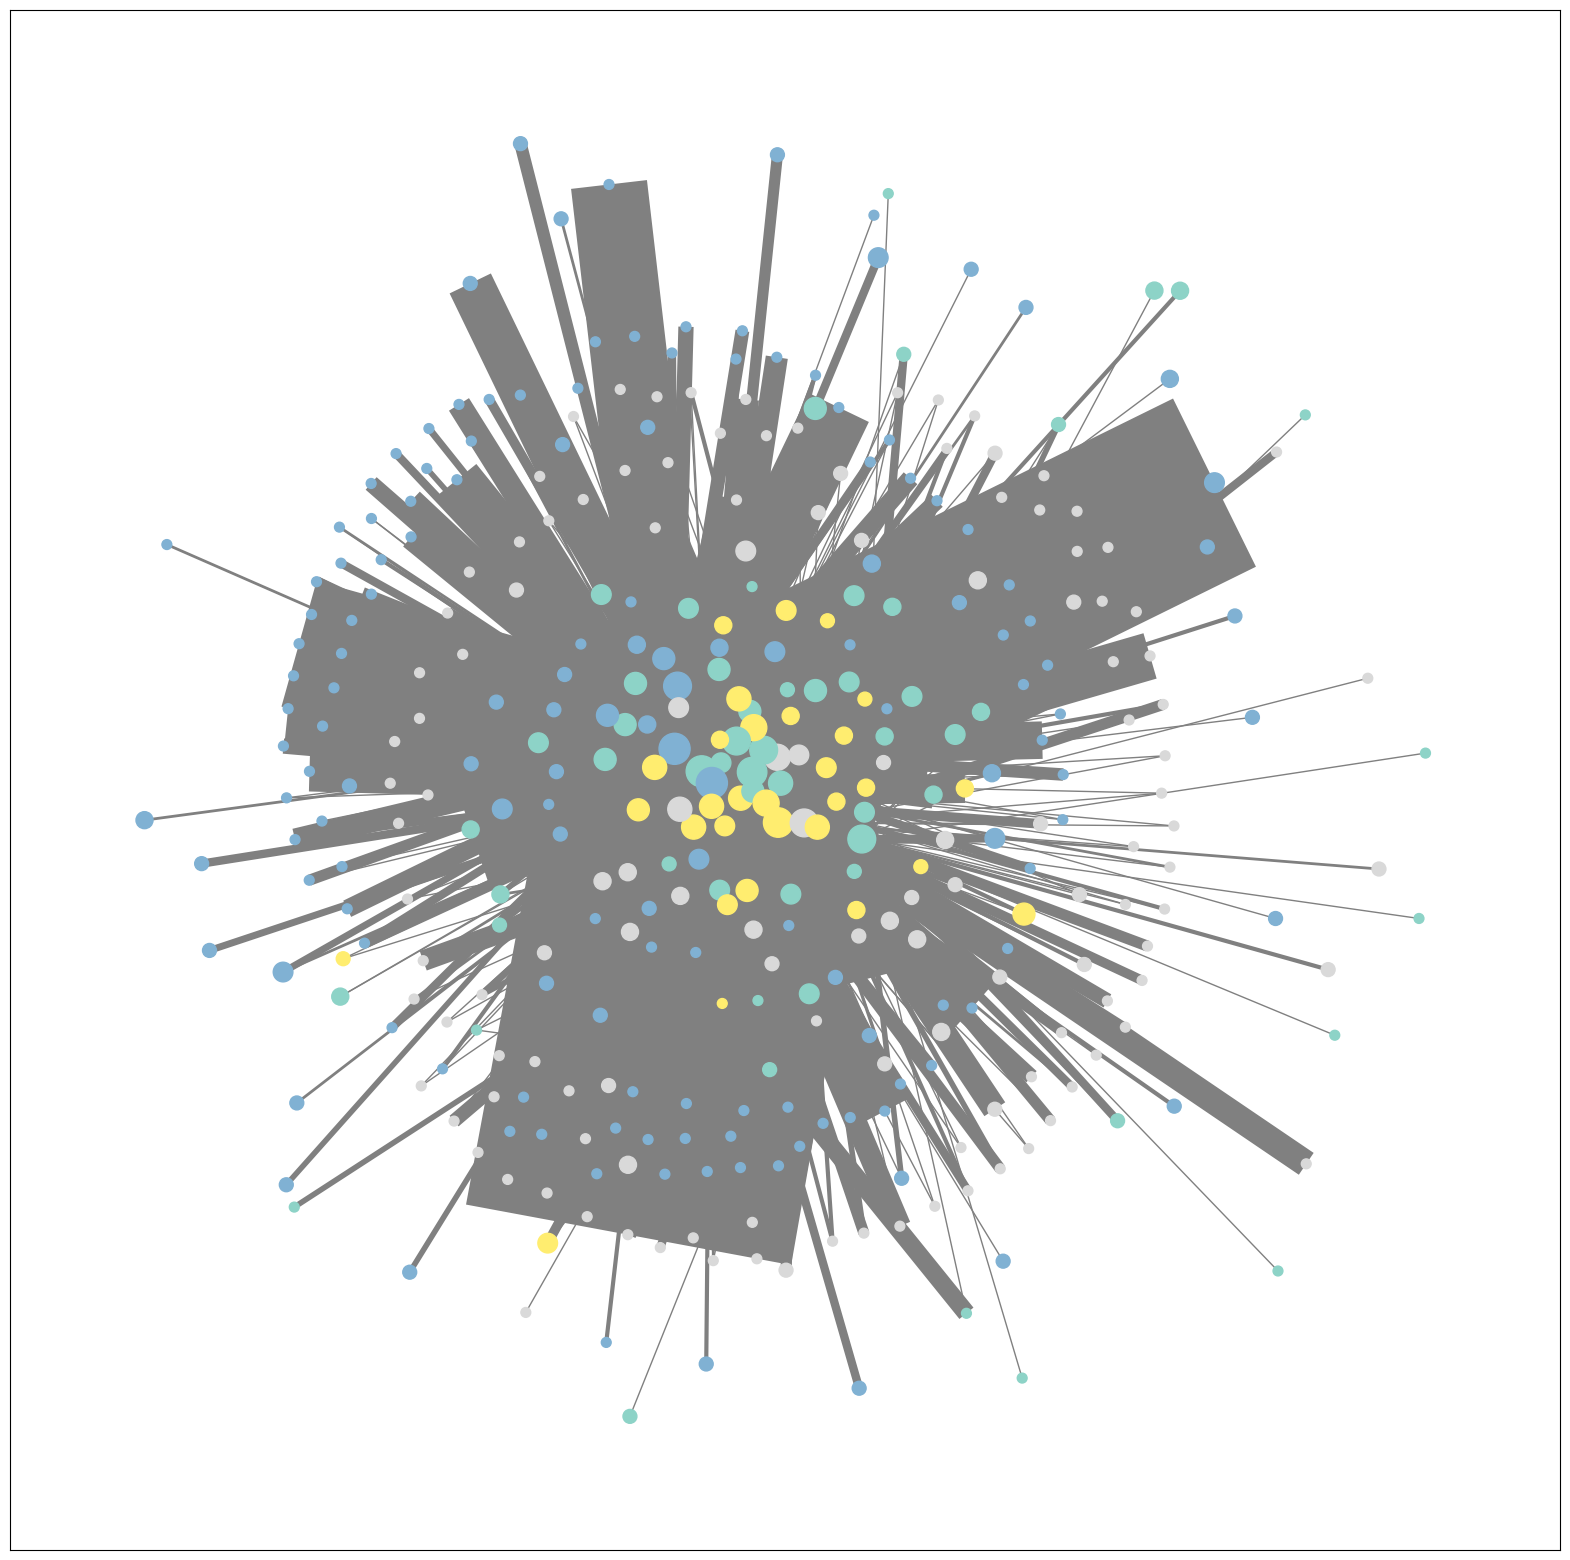

In [31]:
#네트워크분석 그래프 시각화

plt.figure(figsize=(20, 20))

labels = nx.get_edge_attributes(G,'weightcustom')

nx.draw_networkx(G, pos, node_size = node_size,
                 node_color = list(partition.values()),
                 edge_color='Gray', width= (a['weight']),
                 font_family=font_name, font_color = 'black',
                 with_labels = True, labels = labels,
                 cmap=plt.cm.Set3, font_size = 18)

plt.savefig("fold160.png")

In [27]:
#근접중심성 분석

close = nx.closeness_centrality(G, distance=None, wf_improved=True)

#근접중심성 결과

close = pd.DataFrame.from_dict(close, orient = 'index').rename(columns= {0:'closeness'})
close = close.sort_values(by=['closeness'], axis=0, ascending=False)
close.to_csv("foldyclose.csv", encoding='utf-8-sig', index=True)
close

,closeness
사용,0.754601
거리,0.632933
제품,0.538686
빠르다,0.534783
측정,0.522663
...,...
매우,0.338222
동생,0.338222
케이스,0.338222
깔끔하다,0.338222
